# Lab 10 : Model Selction

## Import Commomn Libraries

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset contains information about individuals' personality traits and social behavior. It can be used to predict personality types (e.g., Introvert or Extrovert) based on various social and behavioral factors.

| Field                      | Description                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
| Time_spent_Alone           | Average time (in hours) an individual spends alone per day                 |
| Stage_fear                 | Whether the individual has stage fear (Yes/No)                             |
| Social_event_attendance    | Number of social events attended in a given time period                    |
| Going_outside              | Average number of times the person goes outside in a week                  |
| Drained_after_socializing | Whether the individual feels drained after social interaction (Yes/No)     |
| Friends_circle_size        | Number of close friends in their social circle                             |
| Post_frequency             | Frequency of posting on social media platforms per week                    |
| Personality                | Target variable — personality type of the individual (Introvert/Extrovert) |


## Import Training Dataset

In [2]:
df = pd.read_csv('personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


## EDA Steps

In [3]:
df.shape

(2900, 8)

In [4]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [6]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [7]:
df.describe(include = 'object')

,Stage_fear,Drained_after_socializing,Personality
count,2827,2848,2900
unique,2,2,2
top,No,No,Extrovert
freq,1417,1441,1491


In [8]:
# Check for missing values in each column
print(df.isnull().sum())

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [9]:
# Fill missing values in numerical columns with the mean
df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mean(), inplace=True)
df['Social_event_attendance'].fillna(df['Social_event_attendance'].mean(), inplace=True)
df['Going_outside'].fillna(df['Going_outside'].mean(), inplace=True)
df['Friends_circle_size'].fillna(df['Friends_circle_size'].mean(), inplace=True)
df['Post_frequency'].fillna(df['Post_frequency'].mean(), inplace=True)

# Fill missing values in categorical columns with the mode
df['Stage_fear'].fillna(df['Stage_fear'].mode()[0], inplace=True)
df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0], inplace=True)

# Final check for any remaining missing values
print(df.isnull().sum())


Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


C:\Users\Pavan\AppData\Local\Temp\ipykernel_19696\958732724.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mean(), inplace=True)
C:\Users\Pavan\AppData\Local\Temp\ipykernel_19696\958732724.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

# Data visualization and pre-processing Steps

Let’s see how many of each class is in our data set

In [10]:
df['Stage_fear'].value_counts()

Stage_fear
No     1490
Yes    1410
Name: count, dtype: int64

In [11]:
df['Drained_after_socializing'].value_counts()

Drained_after_socializing
No     1493
Yes    1407
Name: count, dtype: int64

In [12]:
df['Personality'].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

Let's plot some columns to underestand data better:

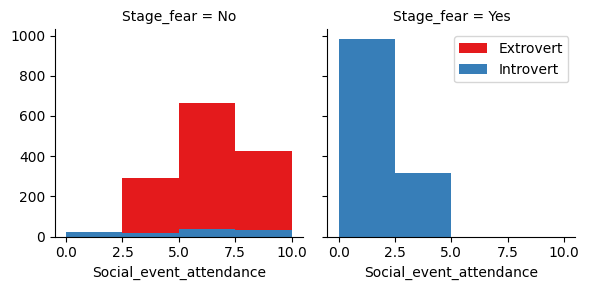

In [13]:
import seaborn as sns

bins = np.linspace(df.Social_event_attendance.min(), 
                   df.Social_event_attendance.max(), 5)
g = sns.FacetGrid(df, col="Stage_fear", 
                  hue="Personality", 
                  palette="Set1", 
                  col_wrap=2)
g.map(plt.hist, 
      'Social_event_attendance', 
      bins=bins, 
      ec="k")

g.axes[-1].legend()
plt.show()

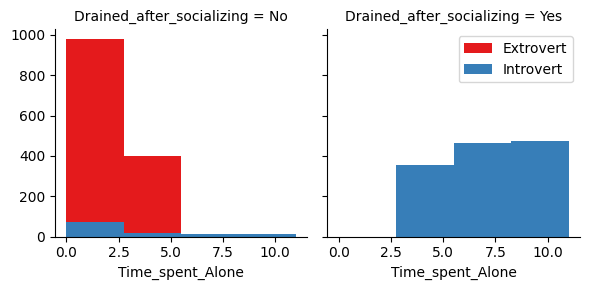

In [14]:
import seaborn as sns

bins = np.linspace(df.Time_spent_Alone.min(), 
                   df.Time_spent_Alone.max(), 5)
g = sns.FacetGrid(df, col="Drained_after_socializing", 
                  hue="Personality", 
                  palette="Set1", 
                  col_wrap=2)
g.map(plt.hist, 
      'Time_spent_Alone',
      bins=bins, 
      ec="k")

g.axes[-1].legend()
plt.show()

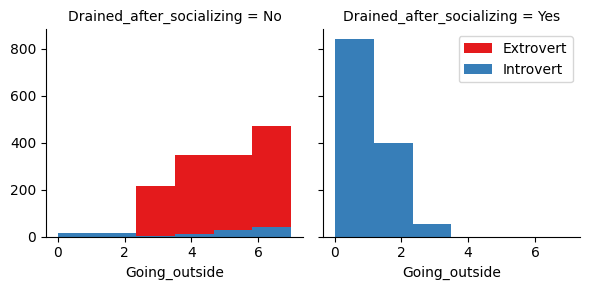

In [15]:
import seaborn as sns

bins = np.linspace(df.Going_outside.min(), 
                   df.Going_outside.max(), 7)
g = sns.FacetGrid(df, col="Drained_after_socializing", 
                  hue="Personality", 
                  palette="Set1", 
                  col_wrap=2)
g.map(plt.hist, 
      'Going_outside', 
      bins=bins, 
      ec="k")

g.axes[-1].legend()
plt.show()

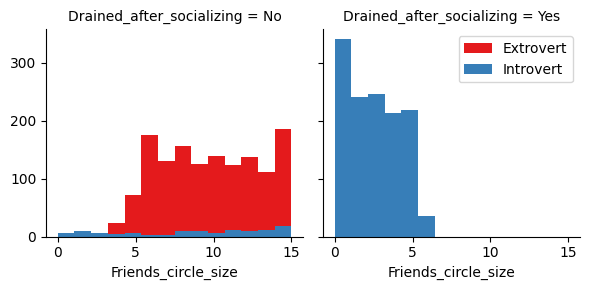

In [16]:
import seaborn as sns

bins = np.linspace(df.Friends_circle_size.min(), 
                   df.Friends_circle_size.max(), 15)
g = sns.FacetGrid(df, col="Drained_after_socializing", 
                  hue="Personality", 
                  palette="Set1", 
                  col_wrap=2)
g.map(plt.hist, 
      'Friends_circle_size', 
      bins=bins, 
      ec="k")

g.axes[-1].legend()
plt.show()

## Pre-processing:  Feature selection/extraction

### Convert Categorical features to numerical values

Let's look at Stage_fear:

In [17]:
df.groupby(['Stage_fear'])['Personality'].value_counts(normalize=True)

Stage_fear  Personality
No          Extrovert      0.926174
            Introvert      0.073826
Yes         Introvert      0.921277
            Extrovert      0.078723
Name: proportion, dtype: float64

94 % of Extrovert people not have stage fear and 92% Introvert have Stage fear

Let's convert No to 0 and Yes to 1:

In [18]:
df['Stage_fear'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)
df.head()

C:\Users\Pavan\AppData\Local\Temp\ipykernel_19696\3079206368.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stage_fear'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,1,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,1,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,0,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,0,9.0,4.0,No,8.0,5.0,Extrovert


In [19]:
df.groupby(['Drained_after_socializing'])['Personality'].value_counts(normalize=True)

Drained_after_socializing  Personality
No                         Extrovert      0.924313
                           Introvert      0.075687
Yes                        Introvert      0.921109
                           Extrovert      0.078891
Name: proportion, dtype: float64

## One Hot Encoding

#### How about Drained_after_socializing?

#### Features before One Hot Encoding

In [20]:
df[['Stage_fear','Drained_after_socializing','Personality']].head()

,Stage_fear,Drained_after_socializing,Personality
0,0,No,Extrovert
1,1,Yes,Introvert
2,1,Yes,Introvert
3,0,No,Extrovert
4,0,No,Extrovert


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [21]:
import pandas as pd

# Step 1: Select basic numeric/categorical columns
Feature = df[['Time_spent_Alone','Stage_fear', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']]

# Step 2: Apply one-hot encoding to categorical columns
encoded = pd.get_dummies(df[[ 'Drained_after_socializing' ]], drop_first=True)

# Step 3: Combine both
Feature = pd.concat([Feature, encoded], axis=1)

# Show the resulting DataFrame
print(Feature.head())
Feature.info()


   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0           0                      4.0            6.0   
1               9.0           1                      0.0            0.0   
2               9.0           1                      1.0            2.0   
3               0.0           0                      6.0            7.0   
4               3.0           0                      9.0            4.0   

   Friends_circle_size  Post_frequency  Drained_after_socializing_Yes  
0                 13.0             5.0                          False  
1                  0.0             3.0                           True  
2                  5.0             2.0                           True  
3                 14.0             8.0                          False  
4                  8.0             5.0                          False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 7 columns):
 #   Column

### Feature Selection

Let's define feature sets, X:

In [22]:
X = Feature
X[0:5]

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Drained_after_socializing_Yes
0,4.0,0,4.0,6.0,13.0,5.0,False
1,9.0,1,0.0,0.0,0.0,3.0,True
2,9.0,1,1.0,2.0,5.0,2.0,True
3,0.0,0,6.0,7.0,14.0,8.0,False
4,3.0,0,9.0,4.0,8.0,5.0,False


What are our lables? Create Output Variable

In [23]:
y = df['Personality']
y[0:5]
d = {'Extrovert':0,'Introvert' : 1}
y = y.map(d)
y

0       0
1       1
2       1
3       0
4       0
       ..
2895    0
2896    0
2897    1
2898    1
2899    0
Name: Personality, Length: 2900, dtype: int64

## Normalize Data

Data Standardization give data zero mean and unit variance (technically should be done after train test split)

### Split the Data into Training and Testing Set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=35)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2030, 7) (2030,)
Test set: (870, 7) (870,)


In [25]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.14701445, -0.97278401,  0.01275908,  1.35061257,  1.59067969,
         0.49610435, -0.97077178],
       [ 1.30622592,  1.02797743, -1.37994399, -1.35061257, -1.48143661,
        -0.19519859,  1.03010823],
       [ 1.30622592,  1.02797743, -1.03176822, -0.45020419, -0.29985342,
        -0.54085006,  1.03010823],
       [-1.30960674, -0.97278401,  0.70911062,  1.80081676,  1.82699632,
         1.53305877, -0.97077178],
       [-0.43766252, -0.97278401,  1.75363792,  0.45020419,  0.4090965 ,
         0.49610435, -0.97077178]])

# Classification

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\

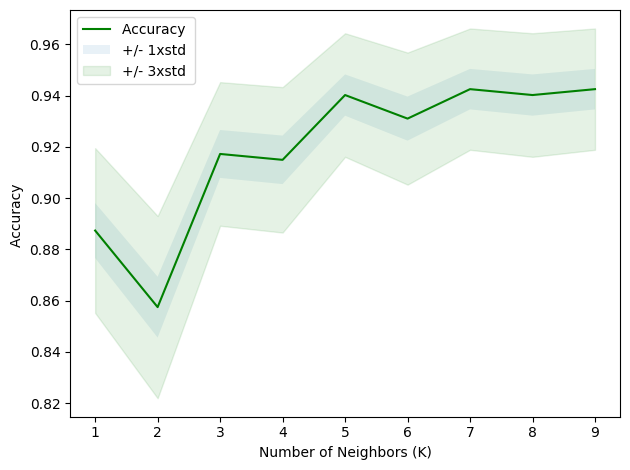

The best accuracy was with 0.9425287356321839 with k= 7


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):  
    knn1 = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn1.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

### Parameter Tunning using Grid Search Cv

In [27]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 18))
weight_options = ['uniform', 'distance']
pow = [1, 2]
param_grid = dict(n_neighbors=k_range, 
                  weights=weight_options,
                  p=pow)

# Grid search setup
knn_gs = KNeighborsClassifier()
grid_k = GridSearchCV(knn_gs, 
                    param_grid, 
                    cv=10, 
                    scoring='accuracy',
                    n_jobs=-1)  # Add parallel processing

# Fit the model
grid_k.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [28]:
print("Tuned Hyperparameters :", grid_k.best_params_)
print("Accuracy :",grid_k.best_score_)

Tuned Hyperparameters : {'n_neighbors': 17, 'p': 1, 'weights': 'uniform'}
Accuracy : 0.9310344827586207


In [29]:
knn1 = KNeighborsClassifier(n_neighbors= 17, p = 1, weights = 'uniform')

In [30]:
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17, p=1)

In [31]:
yhat = knn1.predict(X_test)

In [32]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
a1 = jaccard_score(y_test,yhat,pos_label=1)
b1 = f1_score(y_test, yhat, average='weighted')
c1 = accuracy_score(y_test, yhat)
print('The jaccard_score of the KNN for k = 7 classifier on train data is {:.2f}'.format(a1))
print('The F1-score of the KNN for k = 7 classifier on train data is {:.2f}'.format(b1))
print('The Accuracy_score of the KNN for k = 7 classifier on train data is {:.2f}'.format(c1))

The jaccard_score of the KNN for k = 7 classifier on train data is 0.89
The F1-score of the KNN for k = 7 classifier on train data is 0.94
The Accuracy_score of the KNN for k = 7 classifier on train data is 0.94


# Decision Tree

### Parameter Tuning For Decision tree to find best tree

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion' :['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\Pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

### Find the best parameters

In [34]:
print("Tuned Hyperparameters :", grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)

Tuned Hyperparameters : {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}
Accuracy : 0.9300492610837438


In [35]:
Result_Tree = grid_search.best_estimator_
print(Result_Tree)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, max_features='sqrt',
                       random_state=1024)


### Train the best model using Training Data

In [36]:
Result_Tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, max_features='sqrt',
                       random_state=1024)

In [37]:
predTree = Result_Tree.predict(X_test)

In [38]:
a2 = jaccard_score(y_test, predTree,pos_label=1)
b2 = f1_score(y_test, predTree, average='weighted')
c2 = accuracy_score(y_test, predTree)
print("The accuraccy of (Personality_Tree) DecisionTrees's {:.2f} ".format(c2))
print('The jaccard_score of the (Personality_Tree) DecisionTrees classifier on train data is {:.2f}'.format(a2))
print('The F1-score of the (Personality_Tree) DecisionTrees classifier on train data is {:.2f}'.format(b2))

The accuraccy of (Personality_Tree) DecisionTrees's 0.94 
The jaccard_score of the (Personality_Tree) DecisionTrees classifier on train data is 0.89
The F1-score of the (Personality_Tree) DecisionTrees classifier on train data is 0.94


# Support Vector Machine

### Parameter Tunning For SVM using GridSerachCV

In [39]:
from sklearn.svm import SVC
# Keep poly kernel + reduce grid size
param_grid = {
    'C': [0.1, 1, 10],                     # Removed 100 to reduce load
    'gamma': [0.01, 0.001],                # Skip high gamma
    'kernel': ['rbf', 'sigmoid', 'poly']   # Keep poly
}

# GridSearchCV with all cores used
grid_s = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, n_jobs=-1)
grid_s.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             verbose=2)

In [40]:
print("Tuned Hyperparameters :", grid_s.best_params_)
print("Accuracy :",grid_s.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy : 0.9305418719211822


In [41]:
svm = SVC(probability=True,C=0.1, gamma=0.01, kernel='rbf')
print(svm)

SVC(C=0.1, gamma=0.01, probability=True)


In [42]:
svm.fit(X_train, y_train)

SVC(C=0.1, gamma=0.01, probability=True)

In [43]:
yhat_s = svm.predict(X_test)

In [44]:
a3 = jaccard_score(y_test, yhat_s,pos_label=1)
b3 = f1_score(y_test, yhat_s, average='weighted')
c3 = accuracy_score(y_test, yhat_s)
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train, y_train)))
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test, y_test)))
print('The jaccard_score of the SVM classifier on train data is {:.2f}'.format(a3))
print('The F1-score of the SVM classifier on train data is {:.2f}'.format(b3))
print('The accuracy-score of the SVM classifier on train data is {:.2f}'.format(c3))

The accuracy of the svm classifier on training data is 0.93 out of 1
The accuracy of the svm classifier on test data is 0.94 out of 1
The jaccard_score of the SVM classifier on train data is 0.89
The F1-score of the SVM classifier on train data is 0.94
The accuracy-score of the SVM classifier on train data is 0.94


# Logistic Regression

### Parameter Tunning using Grid Serch CV

In [45]:
from sklearn.linear_model import LogisticRegression
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
clf.fit(X_train,y_train)

C:\Users\Pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Pavan\AppD

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [46]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': np.float64(0.001), 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.9305418719211822


In [47]:
log_reg = clf.best_estimator_
log_reg.fit(X_train,y_train)

LogisticRegression(C=np.float64(0.001), solver='newton-cg')

In [48]:
yhat_l = log_reg.predict(X_test)

In [49]:
a4 = jaccard_score(y_test, yhat_l,pos_label=1)
b4 = f1_score(y_test, yhat_l, average='weighted')
c4 = accuracy_score(y_test, yhat_l)

print('The jaccard_score of the logistic regression classifier on train data is {:.2f}'.format(a4))
print('The F1-score of the logistic regression classifier on train data is {:.2f}'.format(b4))
print('The accuracy_score of the logistic regression classifier on train data is {:.2f}'.format(c4))


The jaccard_score of the logistic regression classifier on train data is 0.89
The F1-score of the logistic regression classifier on train data is 0.94
The accuracy_score of the logistic regression classifier on train data is 0.94


# Model Evaluation 

In [50]:
result_df=pd.DataFrame({'Model':['KNN','Decision Tree','SVM','Logistic Regression'],
                    'Jaccard Score' : [a1,a2,a3,a4],
                    'F1 Score' : [b1,b2,b3,b4],
                    'Accuracy Score':[c1,c2,c3,c4]})

In [51]:
print(result_df)

                 Model  Jaccard Score  F1 Score  Accuracy Score
0                  KNN       0.890625   0.94369        0.943678
1        Decision Tree       0.890625   0.94369        0.943678
2                  SVM       0.890625   0.94369        0.943678
3  Logistic Regression       0.890625   0.94369        0.943678


# using K-fold cross validation

KNN: 0.929557 (0.012665)
DT: 0.930049 (0.013364)
SVM: 0.930542 (0.012930)
LR: 0.930542 (0.012930)


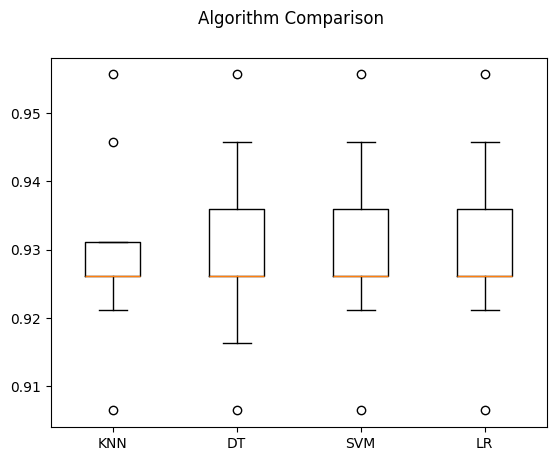

In [52]:
from sklearn import model_selection 
# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []
models.append(('KNN', knn1))
models.append(('DT', Result_Tree ))
models.append(('SVM', svm))
models.append(('LR', log_reg))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    
result_mean =[]
result_std = []
i = 0
for name,model in models:
    msg = "%s: %f (%f)" % (name,results[i].mean(), 
                           results[i].std())
    result_mean.append(results[i].mean()*100)
    result_std.append(results[i].std())
    i = i+1
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Ploting ROC_AUC Curce

In [53]:
#d = {'Pass':0,'Fail' : 1}
#y_test = y_test.map(d)
#y_test

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [knn1, Result_Tree, svm, log_reg]

# Results list instead of appending to DataFrame
results = []

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # For models like SVM without predict_proba by default
        y_scores = model.decision_function(X_test)
        y_proba = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    
    results.append({
        'model': cls.__class__.__name__,
        'fpr': fpr,
        'tpr': tpr,
        'auc': auc
    })

# Convert list to DataFrame
result_table = pd.DataFrame(results)
result_table.set_index('model', inplace=True)


In [55]:
print(result_table)

                                                                      fpr  \
model                                                                       
KNeighborsClassifier    [0.0, 0.006666666666666667, 0.0266666666666666...   
DecisionTreeClassifier               [0.0, 0.0, 0.06222222222222222, 1.0]   
SVC                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00222222...   
LogisticRegression      [0.0, 0.0022222222222222222, 0.002222222222222...   

                                                                      tpr  \
model                                                                       
KNeighborsClassifier    [0.0, 0.26666666666666666, 0.5023809523809524,...   
DecisionTreeClassifier              [0.0, 0.02142857142857143, 0.95, 1.0]   
SVC                     [0.0, 0.002380952380952381, 0.0095238095238095...   
LogisticRegression      [0.0, 0.0, 0.004761904761904762, 0.02142857142...   

                             auc  
model                             
KNei

### Plot The Figure

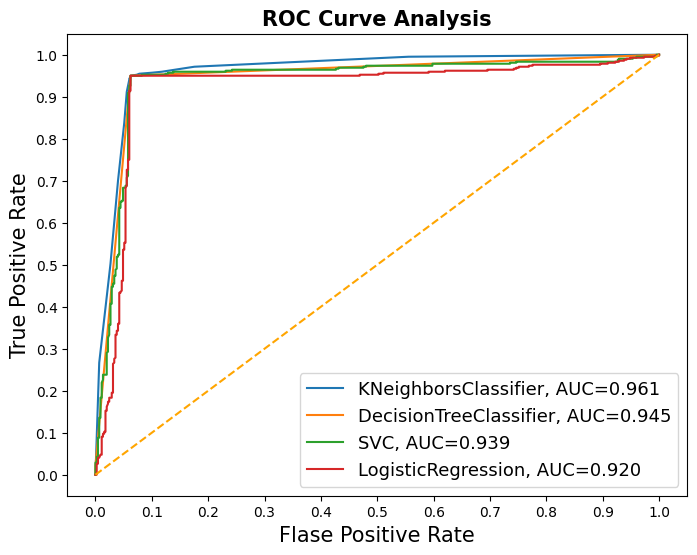

In [56]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()